
## NlP - Text processing
1. Convert text to lowercase for consistency.
2. Remove special characters, punctuations, and numbers (unless useful).
3. Normalize whitespace (multiple spaces → single space).
4. Tokenization: Split text into words.
5. Stopword Removal: Remove common words like "the, is, and".
6. Stemming/Lemmatization: Reduce words to base form (running → run).
7. Handling URLs, Emails, Emojis (replace them with placeholders if needed).
8. Convert emojis and slang into proper words if they have meaning in context.


## Label Encoding
1. Convert textual labels into numerical form:
Spam → 0, Haram → 1, Normal → 2
2. If dataset is imbalanced, consider oversampling/undersampling techniques.

## Feature Engineering (embedding)
1. TF-IDF (Term Frequency-Inverse Document Frequency)
2. Word Embeddings (Word2Vec, FastText, BERT, etc.)
3. Metadata Features (message length, number of links, number of uppercase words).

## Data Splitting
1. Split data into training (80%), validation (10%), and test (10%) sets.
Ensure stratified sampling to maintain class balance.

## Save Processed Data
1. Save as a new CSV or pickle file for efficient model training.
If dataset is large, store in a database for real-time processing.


# Steps involved
## Data Cleaning
1. reading the data
2. Understand the columns and its variables
3. Missing value
4. duplicate values
5. remove unwanted categories


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/task/email_spam_ham/email.csv")

In [ ]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.isnull().sum()

,0
Category,0
Message,0


In [ ]:
df.duplicated().sum()

np.int64(415)

<ipython-input-49-bc30a23fed30>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dup_counts, x='Count', y=dup_counts.index, palette='viridis')


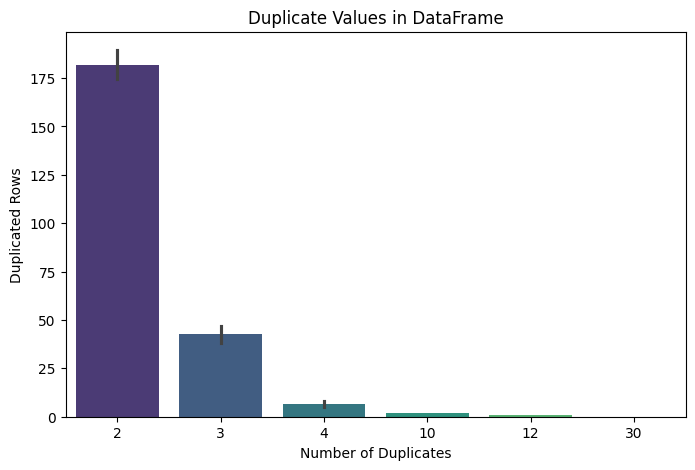

In [ ]:

# Find duplicated rows
dup_counts = df[df.duplicated(keep=False)].value_counts().reset_index(name='Count')

# Plot duplicated values
plt.figure(figsize=(8, 5))
sns.barplot(data=dup_counts, x='Count', y=dup_counts.index, palette='viridis')

plt.xlabel('Number of Duplicates')
plt.ylabel('Duplicated Rows')
plt.title('Duplicate Values in DataFrame')
plt.show()



## NlP - Text processing
1. Convert text to lowercase for consistency.
2. Remove special characters, punctuations, and numbers (unless useful).
3. Normalize whitespace (multiple spaces → single space).
4. Tokenization: Split text into words.
5. Stopword Removal: Remove common words like "the, is, and".
6. Stemming/Lemmatization: Reduce words to base form (running → run).
7. Handling URLs, Emails, Emojis (replace them with placeholders if needed).
8. Convert emojis and slang into proper words if they have meaning in context.


In [ ]:
df[df.duplicated()] # to view the duplicated values


,Category,Message
103,ham,As per your request 'Melle Melle (Oru Minnamin...
154,ham,As per your request 'Melle Melle (Oru Minnamin...
207,ham,"As I entered my cabin my PA said, '' Happy B'd..."
223,ham,"Sorry, I'll call later"
326,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [ ]:
df[df.duplicated()]["Category"].value_counts(), df['Category'].value_counts()

(Category
 ham     309
 spam    106
 Name: count, dtype: int64,
 Category
 ham               4825
 spam               747
 {"mode":"full"       1
 Name: count, dtype: int64)

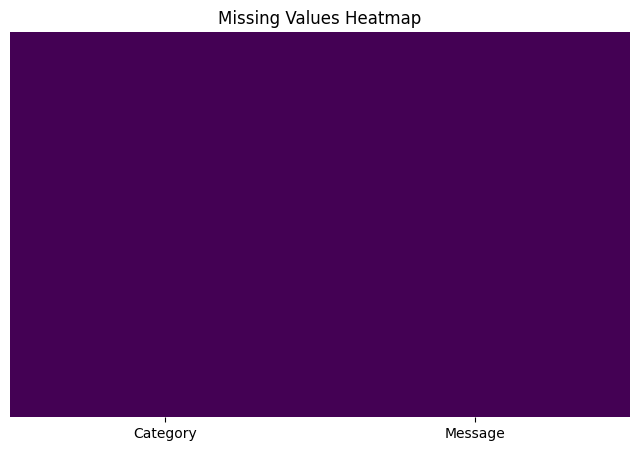

In [ ]:

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


In [ ]:
from wordcloud import WordCloud


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

np.int64(0)


## NlP - Text processing
1. Convert text to lowercase for consistency.
2. Remove special characters, punctuations, and numbers (unless useful).
3. Normalize whitespace (multiple spaces → single space).
4. Tokenization: Split text into words.
5. Stopword Removal: Remove common words like "the, is, and".
6. Stemming/Lemmatization: Reduce words to base form (running → run).
7. Handling URLs, Emails, Emojis (replace them with placeholders if needed).
8. Convert emojis and slang into proper words if they have meaning in context.


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/task/email_spam_ham/email.csv")
df.columns
df["Category"][1]

'ham'

In [ ]:

def convert_lower(df):
  for col in df.columns:
    for ind,val in enumerate(df[col]):
      if isinstance(df.at[ind, col], str):
        df.at[ind, col] = df.at[ind, col].lower()
  return df

df = convert_lower(df)

In [ ]:
# 2.Remove special characters, punctuations, and numbers (unless useful).
import re
def punctuations(df):
  for col in df.columns:
    for ind,val in enumerate(df[col]):
      punc = re.sub(r'[^\w\s]','',val)
      df[col][ind] = punc

punctuations(df)

<ipython-input-58-692d32a306ae>:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col][ind] = punc


In [ ]:
#Normalize whitespace (multiple spaces → single space)
def whitespace(df):
  for col in df.columns:
    for ind,val in enumerate(df[col]):
        if isinstance(val, str):  # ✅ Prevents errors on non-string values
            df.at[ind, col] = ' '.join(val.split())  # ✅ Correct modification
  return df

df= whitespace(df)

In [ ]:
# Stopword Removal: Remove common words like "the, is, and".
# df = pd.read_csv("/content/drive/MyDrive/task/email_spam_ham/email.csv", dtype = str)

In [ ]:
def tokenization(col):
  df[col] = df[col].astype(str).apply(str.split)
  return df
col = "Message"
tokenization(col)

,Category,Message
0,ham,"[go, until, jurong, point, crazy, available, o..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"[nah, i, dont, think, he, goes, to, usf, he, l..."
...,...,...
5568,ham,"[will, ü, b, going, to, esplanade, fr, home]"
5569,ham,"[pity, was, in, mood, for, that, soany, other,..."
5570,ham,"[the, guy, did, some, bitching, but, i, acted,..."
5571,ham,"[rofl, its, true, to, its, name]"


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
import nltk
# nltk.download('stopwords')
eng_stopwords = stopwords.words('english')

print(stopwords.words('english'))
def remove_stopwords(col):
  df[col] = df[col].apply(lambda words: [word for word in words if word not in eng_stopwords])
  return df[col]
col = "Message"
df[col] = remove_stopwords(col)
df

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

,Category,Message
0,ham,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"[nah, dont, think, goes, usf, lives, around, t..."
...,...,...
5568,ham,"[ü, b, going, esplanade, fr, home]"
5569,ham,"[pity, mood, soany, suggestions]"
5570,ham,"[guy, bitching, acted, like, id, interested, b..."
5571,ham,"[rofl, true, name]"


In [ ]:
# lemmatization
from nltk.stem.wordnet import WordNetLemmatizer

lmtzr = WordNetLemmatizer()
df['lemmatize_message'] = df['Message'].apply(
                    lambda lst:[lmtzr.lemmatize(word) for word in lst])

In [ ]:
df.head(3)

,Category,Message,lemmatize_message
0,ham,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."


### label encodeing

In [ ]:
# Convert textual labels into numerical form: Spam → 0, Haram → 1, Normal → 2

df["Category"].value_counts()

,count
Category,
ham,4825
spam,747
modefull,1


In [ ]:
df["Category"].replace({"ham":0,"spam":1,"modefull":1}, inplace = True)

<ipython-input-67-457c6346e5bd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Category"].replace({"ham":0,"spam":1,"modefull":1}, inplace = True)
<ipython-input-67-457c6346e5bd>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Category"].replace({"ham":0,"spam":1,"modefull":1}, inplace = 

In [ ]:
df['text'] = df['lemmatize_message'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) else ' '.join(x))


In [ ]:
X = df['text']
y = df["Category"].astype(str).astype(int)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
df["Category"].value_counts()

,count
Category,
0,4825
1,748


### label encoding
1. tf-idf
2. word to vec

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)
y_pred = lr.predict(X_test_tfidf)


📊 Accuracy Score: 0.9543478260869566
🎯 Precision (macro): 0.9446045711974109
📈 Recall (macro): 0.8539119496855345
📏 F1 Score (macro): 0.8920064058312069

📝 Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1590
           1       0.93      0.72      0.81       250

    accuracy                           0.95      1840
   macro avg       0.94      0.85      0.89      1840
weighted avg       0.95      0.95      0.95      1840



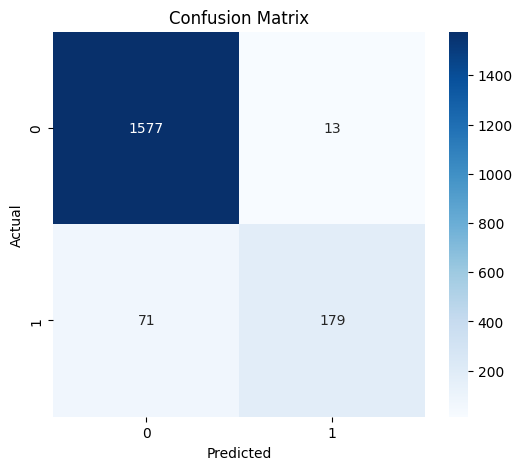

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
model =lr
# 🚨 Make sure you're using predicted class labels, not probabilities
y_pred = model.predict(X_test_tfidf)

# 1. Basic Metrics
print("📊 Accuracy Score:", accuracy_score(y_test, y_pred))
print("🎯 Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("📈 Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("📏 F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

# 2. Full Classification Report
print("\n📝 Classification Report:\n")
print(classification_report(y_test, y_pred))

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
